In [5]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import json

# JSON 파일 로드
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

data_dict = {}

num=0
for num in range(400):
    bbox_list = []

    # 바운딩 박스 정보 수집 함수 정의
    def yxwh(x, bbox_list):
        if x:
            if isinstance(x, list):
                for _x in x:
                    yxwh(_x, bbox_list)
            elif isinstance(x, dict):
                for key, value in x.items():
                    if key == 'bboxes':
                        bbox_list.extend(value)
                    elif key == 'bbox':
                        bbox_list.append(value)
                    else:
                        yxwh(value, bbox_list)

    # 바운딩 박스 정보 추출
    yxwh(data[num]['models'], bbox_list)

    def remove_duplicates(d):
        x = []
        new_x= []

        for i in d:
            if i not in x:
                x.append(i)
            else:
                if i not in new_x:
                    new_x.append(i)
        return new_x


    y_axis_data = []
    bar_where = []
    x_axis_data = []

    fig_type = data[num].get('type', 'unknown')

    for bbox in bbox_list:
        bar_where.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })
    
    if num <200:
        # y_axis의 major_ticks 바운딩 박스 정보 저장
        y_bboxes_data = data[num]['general_figure_info']['y_axis']['major_ticks']['bboxes']
        y_bboxes_data = remove_duplicates(y_bboxes_data)
        for bbox in y_bboxes_data:
            y_axis_data.append({
                'x': bbox['x'],
                'y': bbox['y'],
                'w': bbox['w'],
                'h': bbox['h']
            })
   

        x_bboxes_data= data[num]['general_figure_info']['x_axis']['major_labels']['bboxes']
        x_bboxes_data = remove_duplicates(x_bboxes_data)
        for bbox in x_bboxes_data:
            x_axis_data.append({
                'x': bbox['x'],
                'y': bbox['y'],
                'w': bbox['w'],
                'h': bbox['h']
            })
    else:
        y_bboxes_data = data[num]['general_figure_info']['y_axis']['major_labels']['bboxes']
        y_bboxes_data = remove_duplicates(y_bboxes_data)
        for bbox in y_bboxes_data:
            y_axis_data.append({
                'x': bbox['x'],
                'y': bbox['y'],
                'w': bbox['w'],
                'h': bbox['h']
            })
        
        x_bboxes_data= data[num]['general_figure_info']['x_axis']['major_ticks']['bboxes']
        x_bboxes_data = remove_duplicates(x_bboxes_data)
        for bbox in x_bboxes_data:
            x_axis_data.append({
                'x': bbox['x'],
                'y': bbox['y'],
                'w': bbox['w'],
                'h': bbox['h']
            })
        
    

    # data_dict에 저장
    data_dict[num] = {'type':fig_type, 'axis': y_axis_data, 'label': x_axis_data, 'bar_where': bar_where}

# 데이터 출력
for num, data in data_dict.items():
    print(f"num: {num}, data: {data}")


num: 0, data: {'type': 'vbar_categorical', 'axis': [{'x': 51, 'y': 254, 'w': 8, 'h': 8}, {'x': 51, 'y': 211, 'w': 8, 'h': 8}, {'x': 51, 'y': 167, 'w': 8, 'h': 8}, {'x': 51, 'y': 123, 'w': 8, 'h': 8}, {'x': 51, 'y': 79, 'w': 8, 'h': 8}, {'x': 51, 'y': 36, 'w': 8, 'h': 8}], 'label': [{'x': 81, 'y': 280, 'w': 14, 'h': 28.234375}, {'x': 143, 'y': 280, 'w': 14, 'h': 86.78125}, {'x': 205, 'y': 280, 'w': 14, 'h': 62.4375}, {'x': 268, 'y': 280, 'w': 14, 'h': 63.765625}, {'x': 330, 'y': 280, 'w': 14, 'h': 28.75}, {'x': 392, 'y': 280, 'w': 14, 'h': 73.03125}, {'x': 454, 'y': 280, 'w': 14, 'h': 87.328125}, {'x': 516, 'y': 280, 'w': 14, 'h': 72.453125}, {'x': 579, 'y': 280, 'w': 14, 'h': 58.75}, {'x': 641, 'y': 280, 'w': 14, 'h': 56.6875}], 'bar_where': [{'x': 72, 'y': 42, 'w': 31, 'h': 217}, {'x': 135, 'y': 47, 'w': 31, 'h': 212}, {'x': 197, 'y': 52, 'w': 31, 'h': 207}, {'x': 259, 'y': 56, 'w': 31, 'h': 202}, {'x': 321, 'y': 61, 'w': 31, 'h': 197}, {'x': 383, 'y': 66, 'w': 31, 'h': 192}, {'x': 44

In [7]:
import json
import pickle

# JSON 파일 로드
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

data_dict = {}

num=0
for num in range(400):
    bbox_list = []

    # 바운딩 박스 정보 수집 함수 정의
    def yxwh(x, bbox_list):
        if x:
            if isinstance(x, list):
                for _x in x:
                    yxwh(_x, bbox_list)
            elif isinstance(x, dict):
                for key, value in x.items():
                    if key == 'bboxes':
                        bbox_list.extend(value)
                    elif key == 'bbox':
                        bbox_list.append(value)
                    else:
                        yxwh(value, bbox_list)

    # 바운딩 박스 정보 추출
    yxwh(data[num]['models'], bbox_list)

    # 중복 제거 함수 정의
    def remove_duplicates(d):
        x = []
        new_x= []

        for i in d:
            if i not in x:
                x.append(i)
            else:
                if i not in new_x:
                    new_x.append(i)
        return new_x

    # 데이터 초기화
    y_axis_data = []
    bar_where = []
    x_axis_data = []

    fig_type = data[num].get('type', 'unknown')

    # 바 차트 정보 추출
    for bbox in bbox_list:
        bar_where.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })

    # y 축 레이블 정보 추출
    if num < 200:
        y_bboxes_data = data[num]['general_figure_info']['y_axis']['major_ticks']['bboxes']
    else:
        y_bboxes_data = data[num]['general_figure_info']['y_axis']['major_labels']['bboxes']
    
    y_bboxes_data = remove_duplicates(y_bboxes_data)
    for bbox in y_bboxes_data:
        y_axis_data.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })

    # x 축 레이블 정보 추출
    if num < 200:
        x_bboxes_data = data[num]['general_figure_info']['x_axis']['major_labels']['bboxes']
    else:
        x_bboxes_data = data[num]['general_figure_info']['x_axis']['major_ticks']['bboxes']
    
    x_bboxes_data = remove_duplicates(x_bboxes_data)
    for bbox in x_bboxes_data:
        x_axis_data.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })

    # data_dict에 저장
    data_dict[num] = {'type': fig_type, 'axis': y_axis_data, 'label': x_axis_data, 'bar_where': bar_where}

# 피클 파일로 저장할 경로 설정
pickle_file_path_var = r"C:\Users\hi020\Desktop\play\sample_train1\data_dict_var.pkl"
# 데이터 피클 파일로 저장
with open(pickle_file_path_var, 'wb') as f:
    pickle.dump(data_dict, f)

print("피클 파일 저장이 완료되었습니다.")


피클 파일 저장이 완료되었습니다.


In [19]:
y_axis_data

[{'x': 43, 'y': 317, 'w': 60.890625, 'h': 14},
 {'x': 34, 'y': 263, 'w': 69.890625, 'h': 14},
 {'x': 30, 'y': 210, 'w': 74.296875, 'h': 14},
 {'x': 45, 'y': 157, 'w': 59.25, 'h': 14},
 {'x': 45, 'y': 104, 'w': 58.984375, 'h': 14},
 {'x': 44, 'y': 51, 'w': 59.78125, 'h': 14}]

In [8]:
# 데이터 피클 파일에서 로드하여 확인
with open(pickle_file_path, 'rb') as f:
    loaded_data_dict = pickle.load(f)

In [9]:
loaded_data_dict

{600: {'type': 'pie',
  'center': (187.296875, 212.5),
  'edges': [(314.1120923913044, 212.5),
   (298.0887218354661, 150.7969527754876),
   (115.08726416754351, 316.7490837630191)]},
 601: {'type': 'pie',
  'center': (210.0, 212.5),
  'edges': [(357, 212.5),
   (334.2642372823116, 133.96720855180715),
   (123.34720066837029, 93.7553480446706),
   (80.3059667663733, 281.69868310593006),
   (214.32513031218116, 359.43635781447233)]},
 602: {'type': 'pie',
  'center': (200.0, 195.0),
  'edges': [(296.1775585696671, 195.0),
   (104.05667103371574, 188.29176630631378)]},
 603: {'type': 'pie',
  'center': (200.0, 212.5),
  'edges': [(336, 212.5),
   (308.069796424223, 129.93536410286183),
   (152.1924732288384, 85.17977229039893),
   (112.0666262380107, 108.75164204270848),
   (68.34807562966873, 178.38591479185504),
   (128.9025949808528, 328.43601252218116),
   (331.21481154537895, 248.25854067367246)]},
 604: {'type': 'pie',
  'center': (200.0, 195.0),
  'edges': [(303.44827586206895, 19

In [10]:
output_file = r"C:\Users\hi020\Desktop\play\sample_train1\data_output.json"
with open(output_file, 'w') as f:
    json.dump(data_dict, f, indent=4)

print(f"Data has been successfully saved to {output_file}")

Data has been successfully saved to C:\Users\hi020\Desktop\play\sample_train1\data_output.json


In [11]:
#재확인작업

In [15]:
#with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
 #   data = json.load(f)
#num =2
#data[num]['general_figure_info']['x_axis']['major_ticks']['bboxes']

In [33]:
a

[{'y': 254, 'x': 51, 'w': 8, 'h': 8},
 {'y': 211, 'x': 51, 'w': 8, 'h': 8},
 {'y': 167, 'x': 51, 'w': 8, 'h': 8},
 {'y': 123, 'x': 51, 'w': 8, 'h': 8},
 {'y': 79, 'x': 51, 'w': 8, 'h': 8},
 {'y': 36, 'x': 51, 'w': 8, 'h': 8},
 {'y': 254, 'x': 51, 'w': 8, 'h': 8},
 {'y': 211, 'x': 51, 'w': 8, 'h': 8},
 {'y': 167, 'x': 51, 'w': 8, 'h': 8},
 {'y': 123, 'x': 51, 'w': 8, 'h': 8},
 {'y': 79, 'x': 51, 'w': 8, 'h': 8},
 {'y': 36, 'x': 51, 'w': 8, 'h': 8}]

In [34]:
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)
num = 0
a = data[num]['general_figure_info']['x_axis']['major_labels']['bboxes']

In [39]:
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)
num = 0

In [41]:
data[num]['general_figure_info']['x_axis']['major_ticks']['bboxes']

[{'y': 267, 'x': 84, 'w': 8, 'h': 8},
 {'y': 267, 'x': 146, 'w': 8, 'h': 8},
 {'y': 267, 'x': 208, 'w': 8, 'h': 8},
 {'y': 267, 'x': 271, 'w': 8, 'h': 8},
 {'y': 267, 'x': 333, 'w': 8, 'h': 8},
 {'y': 267, 'x': 395, 'w': 8, 'h': 8},
 {'y': 267, 'x': 457, 'w': 8, 'h': 8},
 {'y': 267, 'x': 519, 'w': 8, 'h': 8},
 {'y': 267, 'x': 582, 'w': 8, 'h': 8},
 {'y': 267, 'x': 644, 'w': 8, 'h': 8},
 {'y': 267, 'x': 84, 'w': 8, 'h': 8},
 {'y': 267, 'x': 146, 'w': 8, 'h': 8},
 {'y': 267, 'x': 208, 'w': 8, 'h': 8},
 {'y': 267, 'x': 271, 'w': 8, 'h': 8},
 {'y': 267, 'x': 333, 'w': 8, 'h': 8},
 {'y': 267, 'x': 395, 'w': 8, 'h': 8},
 {'y': 267, 'x': 457, 'w': 8, 'h': 8},
 {'y': 267, 'x': 519, 'w': 8, 'h': 8},
 {'y': 267, 'x': 582, 'w': 8, 'h': 8},
 {'y': 267, 'x': 644, 'w': 8, 'h': 8}]

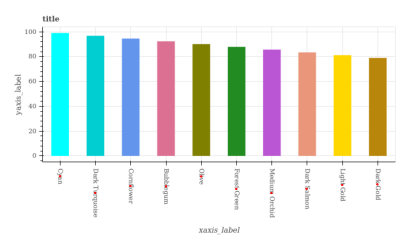

In [38]:
from matplotlib.patches import Circle

img_lo = r"C:\Users\hi020\Desktop\play\sample_train1\png\{}.png".format(num)

fig, ax = plt.subplots(1, figsize=(5,5))
ax.set_axis_off()
ax.imshow(plt.imread(img_lo))

for i in a:
    #circle1 = Circle(((i['x']+,i['y'])), radius=0.5, color='red')
    #ax.add_patch(circle1)
    
    # 우측 상단 점을 원으로 표시합니다.
    circle2 = Circle((i['x'] + i['w']/2, i['y'] + i['h']/2), radius=0.5, color='red')
    ax.add_patch(circle2)
    
plt.show()


In [37]:
a

[{'y': 280, 'x': 81, 'w': 14, 'h': 28.234375},
 {'y': 280, 'x': 143, 'w': 14, 'h': 86.78125},
 {'y': 280, 'x': 205, 'w': 14, 'h': 62.4375},
 {'y': 280, 'x': 268, 'w': 14, 'h': 63.765625},
 {'y': 280, 'x': 330, 'w': 14, 'h': 28.75},
 {'y': 280, 'x': 392, 'w': 14, 'h': 73.03125},
 {'y': 280, 'x': 454, 'w': 14, 'h': 87.328125},
 {'y': 280, 'x': 516, 'w': 14, 'h': 72.453125},
 {'y': 280, 'x': 579, 'w': 14, 'h': 58.75},
 {'y': 280, 'x': 641, 'w': 14, 'h': 56.6875},
 {'y': 280, 'x': 81, 'w': 14, 'h': 28.234375},
 {'y': 280, 'x': 143, 'w': 14, 'h': 86.78125},
 {'y': 280, 'x': 205, 'w': 14, 'h': 62.4375},
 {'y': 280, 'x': 268, 'w': 14, 'h': 63.765625},
 {'y': 280, 'x': 330, 'w': 14, 'h': 28.75},
 {'y': 280, 'x': 392, 'w': 14, 'h': 73.03125},
 {'y': 280, 'x': 454, 'w': 14, 'h': 87.328125},
 {'y': 280, 'x': 516, 'w': 14, 'h': 72.453125},
 {'y': 280, 'x': 579, 'w': 14, 'h': 58.75},
 {'y': 280, 'x': 641, 'w': 14, 'h': 56.6875}]